In [1]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

def transfer_style(content_image, style_image, model_path):

    print("Loading images...")
    content_image = plt.imread(content_image)
    style_image = plt.imread(style_image)

    # Ensure images are 3 channels (RGB) even if they load as 4 (RGBA)
    if content_image.shape[-1] == 4:
        content_image = content_image[..., :3]
    if style_image.shape[-1] == 4:
        style_image = style_image[..., :3]

    print("Resizing and Normalizing images...")
    content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
    style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

    style_image = tf.image.resize(style_image, (256, 256))

    print("Loading pre-trained model...")
    hub_module = hub.load(model_path)

    print("Generating stylized image now...wait a minute")
    outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
    stylized_image = outputs[0]

    stylized_image = np.array(stylized_image)
    stylized_image = stylized_image.reshape(
        stylized_image.shape[1],
        stylized_image.shape[2],
        stylized_image.shape[3]
    )

    print("Stylizing completed...")
    return stylized_image


Loading images...
Resizing and Normalizing images...
Loading pre-trained model...
Generating stylized image now...wait a minute
Stylizing completed...


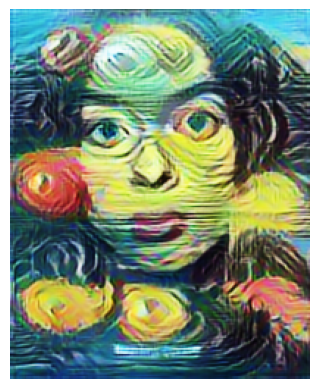

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import matplotlib.pylab as plt
from google.colab import files

# Change these to match your uploaded filenames
content_image_path = "/content/model.jpeg"
style_image_path = "/content/starry_night.jpg"
model_path = "/content/model"

img = transfer_style(content_image_path, style_image_path, model_path)

plt.imsave("stylized_image.png", img)
plt.imshow(img)
plt.axis("off")
plt.show()

files.download("stylized_image.png")
